Deep Learning with Keras and Tensorflow

House Loan Data Analysis
Course-end Project 1

For safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

Objective: Create a model that predicts whether or not an applicant will be able to repay a loan using historical data.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model.

In [1]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)  

In [2]:
import os 
for dirname, _, filenames in os.walk('/kaggle/input'):    
    for filename in filenames:         
        print(os.path.join(dirname, filename))  

In [3]:
import pandas as pd 
import sklearn 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import warnings 
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.datasets import make_blobs 
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC 
from sklearn.metrics import roc_auc_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score 
from sklearn.calibration import CalibratedClassifierCV 
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestClassifier 

In console type

Adding Path setx PATH "%PATH%;C:\path\to\Anaconda3\\"
conda update conda
pip install plotly
pip install --upgrade pip on terminal

conda install -c conda-forge cufflinks-py
pip install lightgbm


In [4]:
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import SGDClassifier 
import plotly.offline as py 
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode, iplot 
from sklearn.model_selection import train_test_split 
init_notebook_mode(connected=True) 

In [5]:
import cufflinks as cf 
cf.go_offline() 
import pickle 
import gc 

In [6]:
import lightgbm as lgb 
warnings.filterwarnings('ignore') 

Loading the dataset

In [7]:
import csv
# csv file name
house_loan = pd.read_csv(r'D:\OneDrive\Knowledge Center\AI - ML\Masters in Artifical Engineer\Deep Learning with Keras and Tensorflow\loan_data.csv') 


In [8]:
house_loan.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
house_loan.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [10]:
print(house_loan.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [11]:
house_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Check for null values in the dataset

In [12]:
null_values = house_loan.isnull()
null_count = house_loan.isnull().sum()

In [13]:
print(null_values, null_count)

        SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0            False   False               False        False         False   
1            False   False               False        False         False   
2            False   False               False        False         False   
3            False   False               False        False         False   
4            False   False               False        False         False   
...            ...     ...                 ...          ...           ...   
307506       False   False               False        False         False   
307507       False   False               False        False         False   
307508       False   False               False        False         False   
307509       False   False               False        False         False   
307510       False   False               False        False         False   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0   

In [14]:
null_count

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [15]:
#Instead of dropping null values house_loan = house_loan.dropna() filling it up with mean
# fill null values with mean
# fill missing values in numeric columns with mean
for col in house_loan.select_dtypes(include=['int64', 'float64']).columns:
    house_loan[col] = house_loan[col].fillna(house_loan[col].mean())

# fill missing values in non-numeric columns with most frequent value
for col in house_loan.select_dtypes(exclude=['int64', 'float64']).columns:
    house_loan[col] = house_loan[col].fillna(house_loan[col].mode()[0])

In [16]:
null_count = house_loan.isnull().sum()
null_count

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

Print percentage of default to payer of the dataset for the TARGET column
Assuming the defaulters as 1 and 0 

In [17]:
defaulters=(house_loan.TARGET==1).sum() 
payers=(house_loan.TARGET==0).sum() 
print(defaulters, payers)
print((defaulters/payers)*100)


24825 282686
8.781828601345662


In [18]:
#Percentage of defaulters
print((defaulters*100/(defaulters+payers)))

8.072881945686495


Basic cleaning of data. REmovinf duplicate, filling up NaN or null and encoding for analysis

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()
#select non-numeric columns
non_numeric_columns = house_loan.select_dtypes(exclude=['int64', 'float64']).columns

In [21]:
# create a dictionary to store the LabelEncoder objects for each column
le_dict = {}

for col in non_numeric_columns:
    le = LabelEncoder()
    house_loan[col] = le.fit_transform(house_loan[col])
    le_dict[col] = le

# print the encoded DataFrame
print(house_loan)

# print the original values for each encoded number
for col, le in le_dict.items():
    print(f"{col}:")
    for class_, label in enumerate(le.classes_):
        print(f"{class_}: {label}")

        SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   0            1             0   
1           100003       0                   0            0             0   
2           100004       0                   1            1             1   
3           100006       0                   0            0             0   
4           100007       0                   0            1             0   
...            ...     ...                 ...          ...           ...   
307506      456251       0                   0            1             0   
307507      456252       0                   0            0             0   
307508      456253       0                   0            0             0   
307509      456254       1                   0            0             0   
307510      456255       0                   0            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0   

Anotehr method # create a label (category) encoder object
fit and transform the non-numeric columns in the DataFrame
house_loan[non_numeric_columns] = house_loan[non_numeric_columns].apply(le.fit_transform)
print(house_loan)

Balance the dataset if the data is imbalanced
The autogenerated column is SK_ID_CURR
Checking and removing duplicate entries

Duplicates are:  0


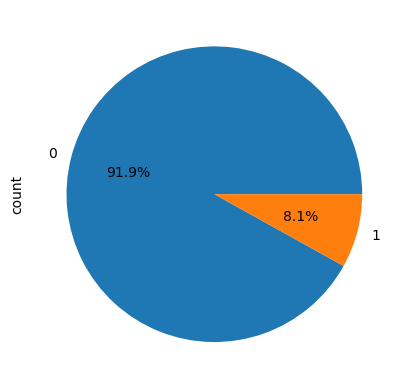

In [28]:
house_loan.TARGET.value_counts().plot(kind='pie',autopct='%1.1f%%')
without_id=[column for column in house_loan.columns if column!='SK_ID_CURR']
na=house_loan[house_loan.duplicated(subset=without_id,keep=False)]  
print("Duplicates are: ",na.shape[0]) 

house_loan.TARGET.value_counts().plot(kind='pie',autopct='%1.1f%%')
without_id=[column for column in house_loan.columns if column!='SK_ID_CURR']
na=house_loan[house_loan.duplicated(subset=without_id,keep=False)]  
print("Duplicates are: ",na.shape[0]) 

#Now that we have encoded, lets check the best features different method 
using univariate methodsklearn.feature_selection requires all values in X to be non-negative. This is because the Chi-squared statistic is a sum of squares, which can’t be calculated with negative values.
Using mutual information which can handle both positive and negative values: It is slow. The code however for refernece are:

In [29]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
X = house_loan.drop('TARGET', axis=1)  # independent columns
y = house_loan['TARGET']  # target column


In [30]:
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(X, y)

In [31]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# concatenate two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns

print(featureScores.nlargest(10, 'Score'))  # print 10 best features

                 Specs     Score
21          FLAG_MOBIL  0.080002
24    FLAG_CONT_MOBILE  0.059899
96     FLAG_DOCUMENT_3  0.056605
22      FLAG_EMP_PHONE  0.056169
4      FLAG_OWN_REALTY  0.055875
85  FONDKAPREMONT_MODE  0.053577
14   NAME_HOUSING_TYPE  0.052065
88  WALLSMATERIAL_MODE  0.043359
61     COMMONAREA_MODE  0.040748
75     COMMONAREA_MEDI  0.040420


In [32]:
shuffled_data=house_loan.sample(frac=1,random_state=3) 
unpaid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==1]  
paid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==0]

In [33]:
unpaid_home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24825 entries, 207339 to 196006
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int32(16), int64(41)
memory usage: 21.8 MB


In [34]:
paid_home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282686 entries, 260810 to 71530
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int32(16), int64(41)
memory usage: 248.0 MB


Checking for balance. An imbalance between the number of paid and unpaid home loans. This could bias the model towards predicting the class that has more instances. To prevent this, a common technique is to undersample the majority class or oversample the minority class to achieve a balanced dataset. After undersampling, the datasets of the two classes are concatenated using pd.concat() to form a new balanced dataset normalised_home_loan. This dataset is then used for further analysis or model training. The pie chart at the end visualizes the distribution of the two classes in the balanced dataset.

In [35]:
paid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==0].sample(n=24825, random_state=3)

In [36]:
import matplotlib.pyplot as plt

Ploting the balanced data or imbalanced data

<Axes: ylabel='count'>

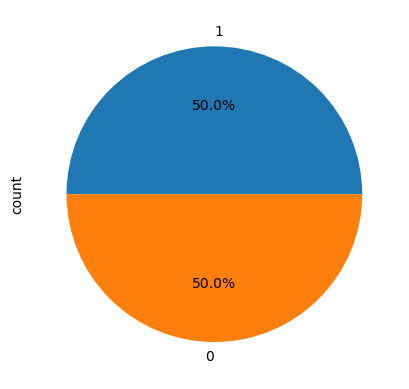

In [37]:
normalised_home_loan=pd.concat([unpaid_home_loan,paid_home_loan])
normalised_home_loan.TARGET.value_counts().plot(kind='pie',autopct="%1.1f%%")

In [38]:
import tensorflow as tf 

In [39]:
normalised_home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49650 entries, 207339 to 139806
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int32(16), int64(41)
memory usage: 43.6 MB


In [40]:
normalised_home_loan.head

<bound method NDFrame.head of         SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
207339      340318       1                   0            0             0   
8756        110186       1                   0            1             1   
230344      366811       1                   0            0             0   
178329      306645       1                   0            1             1   
55586       164407       1                   0            1             0   
...            ...     ...                 ...          ...           ...   
303856      452050       0                   0            0             0   
140173      262532       0                   0            0             0   
44575       151640       0                   1            0             0   
106175      223189       0                   0            0             0   
139806      262117       0                   0            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_IN

In [41]:
normalised_home_loan.dropna(axis=0) 
normalised_home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49650 entries, 207339 to 139806
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int32(16), int64(41)
memory usage: 43.6 MB


In [42]:
normalised_home_loan.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [43]:
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_DAY))  
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_WEEK)) 
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_MON)) 
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_QRT)) 
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_YEAR)) 

[0.         0.00700021 1.         2.         4.         3.
 5.        ]
[0.         0.03436194 1.         2.         4.         3.
 5.         6.         8.        ]
[ 0.          0.26739526  1.          3.          5.          9.
  2.          6.          8.          4.         11.         12.
  7.         13.         10.         17.         15.         14.
 18.         23.         16.        ]
[ 0.          0.26547415  2.          3.          1.          4.
  5.          6.         19.          7.          8.        ]
[ 3.          0.          1.89997444  1.          5.          4.
  2.          6.          7.          8.          9.         10.
 14.         13.         12.         11.         22.         16.
 25.        ]


In [44]:
normalised_home_loan.dropna(axis=0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
207339,340318,1,0,0,0,0,0,112500.0,405000.0,21969.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,3.000000
8756,110186,1,0,1,1,0,0,135000.0,544491.0,17563.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
230344,366811,1,0,0,0,1,0,112500.0,225000.0,17905.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
178329,306645,1,0,1,1,1,0,157500.0,595273.5,29083.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
55586,164407,1,0,1,0,0,0,157500.0,521451.0,35406.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303856,452050,0,0,0,0,1,0,180000.0,314100.0,17167.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,6.000000
140173,262532,0,0,0,0,0,0,202500.0,490495.5,46701.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,2.000000
44575,151640,0,1,0,0,0,0,180000.0,315000.0,15750.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
106175,223189,0,0,0,0,1,0,180000.0,207396.0,13383.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,2.000000


Column - 'SK_ID_CURR' - to remove, 
'TARGET' - Tells if person has defaulted. We have balanced it. 
Adding the parameters we thik is important. 
'NAME_CONTRACT_TYPE' - It is Type of loan
'CODE_GENDER' - Gender 
'FLAG_OWN_CAR' - Needed 
'CNT_CHILDREN' - Count of children 
'AMT_INCOME_TOTAL' - Better to group it

Now adding the important ones that we got earlier
21          FLAG_MOBIL  0.079671
24    FLAG_CONT_MOBILE  0.058517
4      FLAG_OWN_REALTY  0.056045
22      FLAG_EMP_PHONE  0.055531
96     FLAG_DOCUMENT_3  0.055391
85  FONDKAPREMONT_MODE  0.054326
14   NAME_HOUSING_TYPE  0.051551
88  WALLSMATERIAL_MODE  0.044663
61     COMMONAREA_MODE  0.040486
47      COMMONAREA_AVG  0.040430


Visual represntation of the individual componenent

<Axes: ylabel='count'>

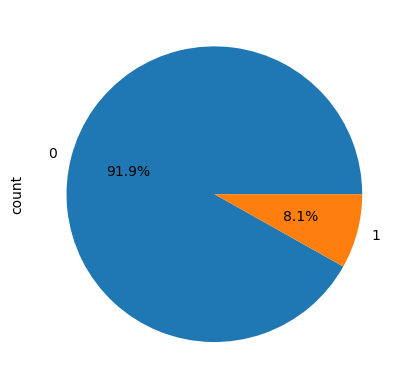

In [45]:
normalised_home_loan.NAME_CONTRACT_TYPE.value_counts().plot(kind='pie',autopct="%1.1f%%")
                                                           

<Axes: ylabel='count'>

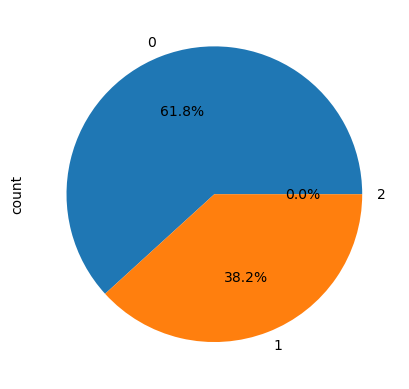

In [46]:
normalised_home_loan.CODE_GENDER.value_counts().plot(kind='pie',autopct="%1.1f%%")  

<Axes: ylabel='count'>

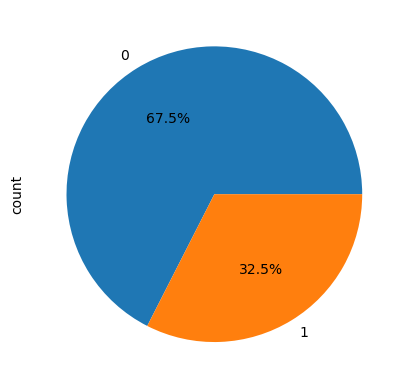

In [47]:
normalised_home_loan.FLAG_OWN_CAR.value_counts().plot(kind='pie',autopct="%1.1f%%") 

<Axes: ylabel='count'>

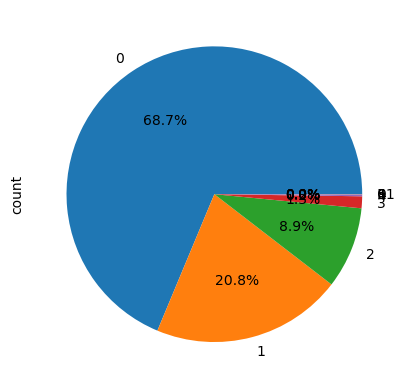

In [48]:
normalised_home_loan.CNT_CHILDREN.value_counts().plot(kind='pie',autopct="%1.1f%%") 

<Axes: ylabel='count'>

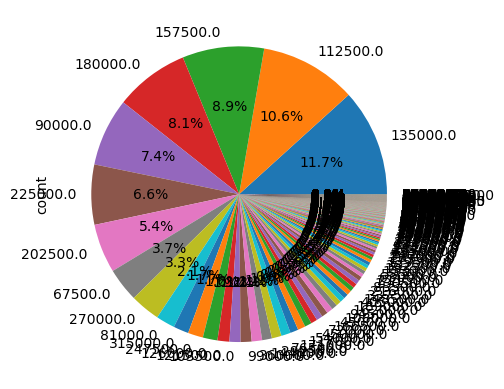

In [49]:
normalised_home_loan.AMT_INCOME_TOTAL.value_counts().plot(kind='pie',autopct="%1.1f%%") 

<Axes: ylabel='count'>

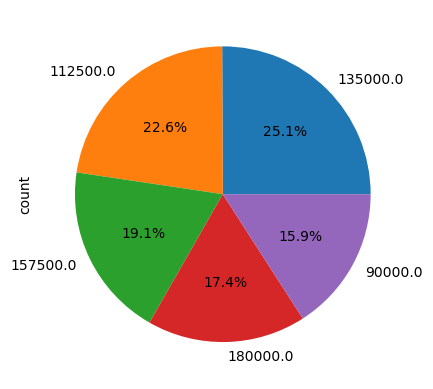

In [50]:
normalised_home_loan.AMT_INCOME_TOTAL.value_counts().nlargest(5).plot(kind='pie', autopct="%1.1f%%")

<Axes: ylabel='count'>

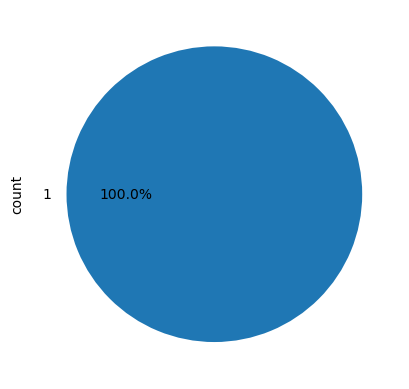

In [51]:
normalised_home_loan.FLAG_MOBIL.value_counts().plot(kind='pie', autopct="%1.1f%%")

<Axes: ylabel='count'>

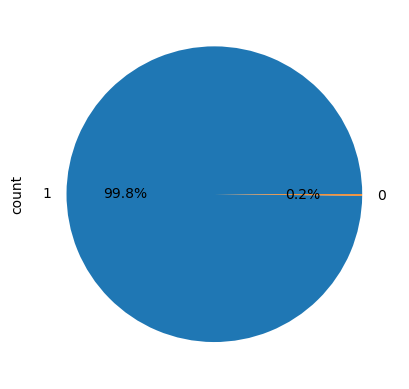

In [52]:
normalised_home_loan.FLAG_CONT_MOBILE.value_counts().plot(kind='pie', autopct="%1.1f%%")

<Axes: ylabel='count'>

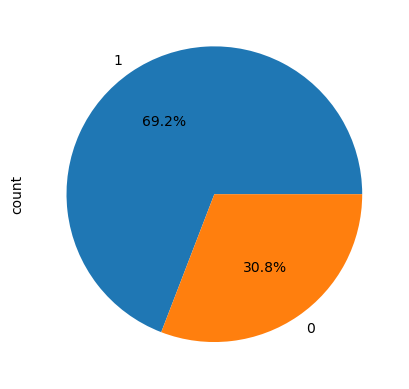

In [53]:
normalised_home_loan.FLAG_OWN_REALTY.value_counts().plot(kind='pie', autopct="%1.1f%%")

<Axes: ylabel='count'>

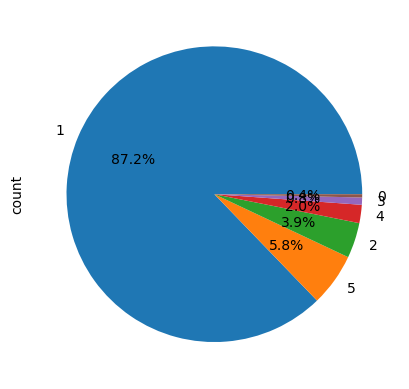

In [54]:
normalised_home_loan.NAME_HOUSING_TYPE.value_counts().plot(kind='pie', autopct="%1.1f%%")

<Axes: ylabel='count'>

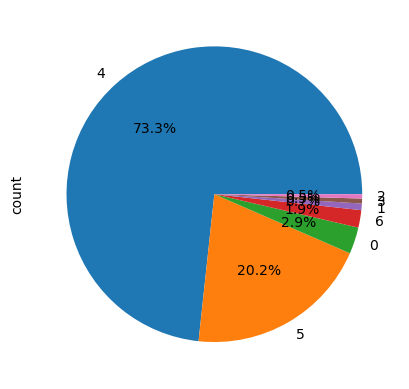

In [55]:
normalised_home_loan.WALLSMATERIAL_MODE.value_counts().plot(kind='pie', autopct="%1.1f%%")

<Axes: ylabel='count'>

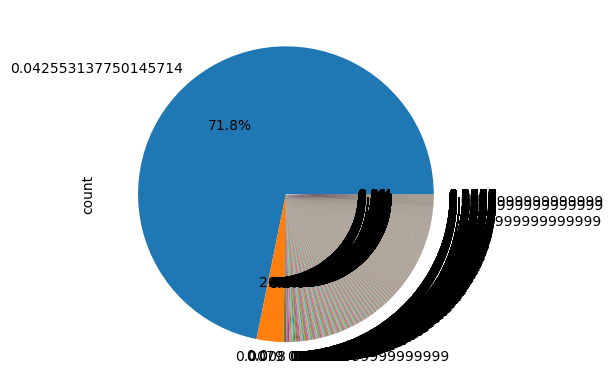

In [56]:
normalised_home_loan.COMMONAREA_MODE.value_counts().plot(kind='pie', autopct="%1.1f%%")

<Axes: ylabel='count'>

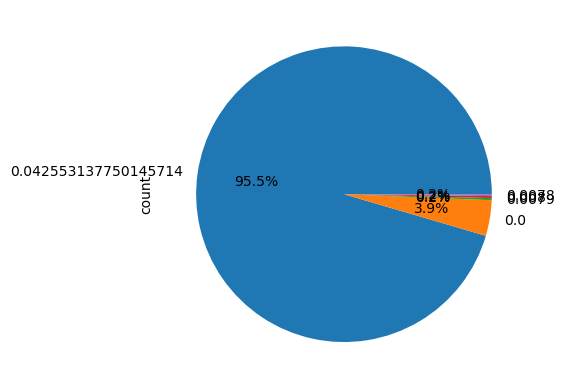

In [57]:
normalised_home_loan.COMMONAREA_MODE.value_counts().nlargest(5).plot(kind='pie', autopct="%1.1f%%")

<Axes: ylabel='count'>

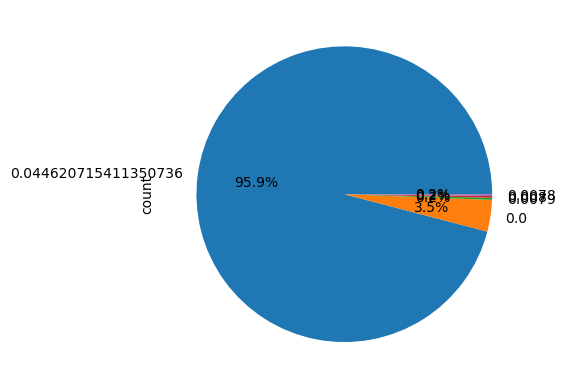

In [58]:
normalised_home_loan.COMMONAREA_AVG.value_counts().nlargest(5).plot(kind='pie', autopct="%1.1f%%")

The columns we have selected 
'NAME_CONTRACT_TYPE' - It is Type of loan
'CODE_GENDER' - Gender 
'FLAG_OWN_CAR' - 
'CNT_CHILDREN' - Count of children 
'AMT_INCOME_TOTAL' - top categories

Now adding the important ones that we got earlier
FLAG_CONT_MOBILE  If they have mobile
FLAG_OWN_REALTY  - If they have real estate
NAME_HOUSING_TYPE  - type of house
WALLSMATERIAL_MODE - walls type
COMMONAREA_MODE  - common area type
COMMONAREA_AVG  - avg common area


In [59]:
normalised_home_loan_features=['SK_ID_CURR','NAME_CONTRACT_TYPE','CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_CONT_MOBILE', 'FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE', 'WALLSMATERIAL_MODE', 'COMMONAREA_MODE', 'COMMONAREA_AVG']                             

In [60]:
normalised_home_loan_features

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'FLAG_CONT_MOBILE',
 'FLAG_OWN_REALTY',
 'NAME_HOUSING_TYPE',
 'WALLSMATERIAL_MODE',
 'COMMONAREA_MODE',
 'COMMONAREA_AVG']

To start calculating sensitivity
Sensitivity is a measure of the proportion of actual positive cases that got predicted as positive (or, how many of the true positives were recalled). So, high Sensitivity means that the model predicted the positive cases very well

In [163]:
from sklearn.model_selection import train_test_split 
X=normalised_home_loan[normalised_home_loan_features]  

In [164]:
X

,SK_ID_CURR,NAME_CONTRACT_TYPE,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_CONT_MOBILE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,WALLSMATERIAL_MODE,COMMONAREA_MODE,COMMONAREA_AVG
207339,340318,0,0,112500.0,1,0,5,5,0.007000,0.007000
8756,110186,0,0,135000.0,1,0,1,5,0.042553,0.044621
230344,366811,0,0,112500.0,1,1,1,4,0.042553,0.044621
178329,306645,0,0,157500.0,1,1,1,4,0.042553,0.044621
55586,164407,0,0,157500.0,1,0,1,5,0.014300,0.014200
...,...,...,...,...,...,...,...,...,...,...
303856,452050,0,0,180000.0,1,1,1,4,0.042553,0.044621
140173,262532,0,0,202500.0,1,0,2,5,0.009500,0.009400
44575,151640,1,0,180000.0,1,0,1,0,0.038800,0.038400
106175,223189,0,0,180000.0,1,1,1,5,0.008600,0.008500


setting up parameters
blobs_random_seed = 42: This sets the seed for the random number generator to 42. centers = [(0,0), (5,5)] - defines centers.  In this case, there will be two clusters: one centered at (0,0) and the other at (5,5). cluster_std = 1: This sets the standard deviation of the clusters. A higher value will make the clusters more spread out. frac_test_split = 0.33: This is likely the fraction of the data that will be used for the test set in a train/test split. num_features_for_samples = 2: This is the number of features for each sample in the synthetic dataset. In this case, each sample will have two features.num_samples_total = 49650: This is the total number of samples in the synthetic dataset. See from above.

In [165]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.33, random_state=42)

In [166]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33265, 2) (16385, 2) (33265,) (16385,)


In [ ]:
#Since the target variable is of categorical data (either default or not), using logistic regression

In [71]:
trainX = tf.constant(X_train, dtype='float32')
trainY = tf.constant(y_train, dtype='float32')
testX = tf.constant(X_test, dtype='float32')
testY = tf.constant(y_test, dtype='float32')

In [167]:
# Assuming your data has 'n' features
n = trainX.shape[1]

# Create a variable for weights
weights = tf.Variable(tf.random.normal(shape=(n, 1), dtype='float32'))

# Create a variable for biases
bias = tf.Variable(tf.zeros(shape=(1,), dtype='float32'))

In [168]:
print(n, weights, bias)

2 <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.21015579],
       [-1.1603422 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [169]:
import tensorflow as tf

# Define the logistic regression model
class LogisticRegression(tf.keras.Model):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs, training=None, mask=None):
        output = self.dense(inputs)
        return output

# Instantiate the model
model = LogisticRegression()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))

# Evaluate the model
loss, accuracy = model.evaluate(testX, testY)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/10
1040/1040 [==============================] - 8s 5ms/step - loss: 0.7824 - accuracy: 0.5809 - val_loss: 0.3779 - val_accuracy: 0.8236
Epoch 2/10
1040/1040 [==============================] - 4s 4ms/step - loss: 0.2714 - accuracy: 0.8956 - val_loss: 0.1916 - val_accuracy: 0.9467
Epoch 3/10
1040/1040 [==============================] - 4s 4ms/step - loss: 0.1478 - accuracy: 0.9698 - val_loss: 0.1110 - val_accuracy: 0.9857
Epoch 4/10
1040/1040 [==============================] - 5s 4ms/step - loss: 0.0892 - accuracy: 0.9911 - val_loss: 0.0695 - val_accuracy: 0.9957
Epoch 5/10
1040/1040 [==============================] - 4s 4ms/step - loss: 0.0577 - accuracy: 0.9970 - val_loss: 0.0462 - val_accuracy: 0.9982
Epoch 6/10
1040/1040 [==============================] - 3s 3ms/step - loss: 0.0392 - accuracy: 0.9985 - val_loss: 0.0320 - val_accuracy: 0.9991
Epoch 7/10
1040/1040 [==============================] - 3s 3ms/step - loss: 0.0277 - accuracy: 0.9990 - val_loss: 0.0229 - val_accuracy:

In [170]:
# Predict the values
predicted_values = model.predict(testX)

# Convert the predicted values to a suitable format
predicted_values = tf.squeeze(predicted_values)

# Calculate the difference
difference = tf.abs(predicted_values - testY)

# Create a DataFrame
df = pd.DataFrame({
    'Predicted Values': predicted_values.numpy(),
    'Actual Values': testY.numpy(),
    'Difference': difference.numpy()
})

# Print the DataFrame
print(df)

513/513 [==============================] - 2s 3ms/step
       Predicted Values  Actual Values  Difference
0              0.003062            0.0    0.003062
1              0.996138            1.0    0.003862
2              0.991433            1.0    0.008567
3              0.021649            0.0    0.021649
4              0.000256            0.0    0.000256
...                 ...            ...         ...
16380          0.999531            1.0    0.000469
16381          0.999976            1.0    0.000024
16382          0.015913            0.0    0.015913
16383          0.998002            1.0    0.001998
16384          0.000675            0.0    0.000675

[16385 rows x 3 columns]


In [172]:
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score

# Convert the predicted values to binary
predicted_values_binary = np.round(predicted_values)

# Calculate the confusion matrix
cm = confusion_matrix(testY, predicted_values_binary)
print('Confusion Matrix: \n', cm)

# Calculate sensitivity
sensitivity = recall_score(testY, predicted_values_binary)
print('Sensitivity: \n', sensitivity)

Confusion Matrix: 
 [[8198    5]
 [   0 8182]]
Sensitivity: 
 1.0


TO Calculate Sensitivity, using confusion matrix. Formula of sensitivity
Sensitivity = True Positives / (True Positives + False Negatives)

In [173]:
# Calculate sensitivity
sensitivity = TP / (TP + FN)
print('Sensitivity: ', sensitivity)
print(predicted_labels_np)
print(y_test_np)

Sensitivity:  nan
[[1. 0. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 1.]]
[[0.4951737  0.49990004 0.5026408  ... 0.49776515 0.49933618 0.4999025 ]
 [0.49399248 0.518196   0.5243953  ... 0.5165168  0.5071083  0.52073383]
 [0.49431065 0.5169351  0.52248305 ... 0.5153087  0.5064719  0.5190457 ]
 ...
 [0.49845693 0.5030438  0.50027335 ... 0.5022285  0.49919215 0.4997525 ]
 [0.4970211  0.51967525 0.52069163 ... 0.51914436 0.5064119  0.5190805 ]
 [0.4984699  0.49787593 0.49468753 ... 0.4968183  0.4971337  0.49421087]]


In [174]:
from sklearn.metrics import roc_auc_score

# Calculate the AUC-ROC
auc_roc = roc_auc_score(testY, predicted_values)

# Print the AUC-ROC
print('AUC-ROC: ', auc_roc)

AUC-ROC:  0.9999999702012663


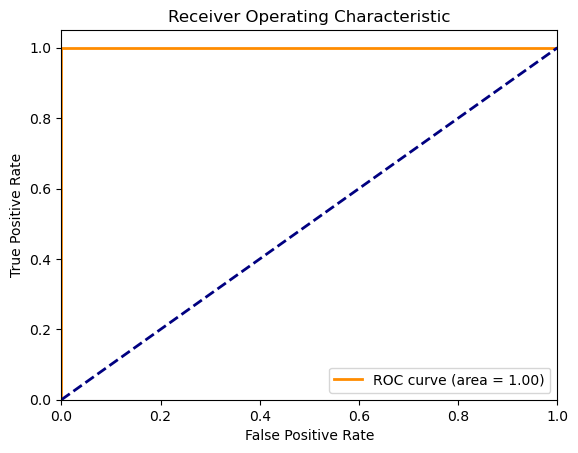

In [175]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(testY, predicted_values)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

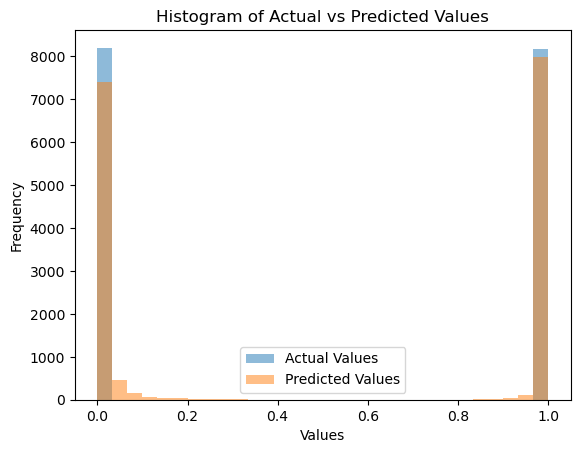

In [177]:
# Create a new figure
plt.figure()
# Plot a histogram of the actual values
plt.hist(testY, bins=30, alpha=0.5, label='Actual Values')

# Plot a histogram of the predicted values
plt.hist(predicted_values, bins=30, alpha=0.5, label='Predicted Values')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Actual vs Predicted Values')
plt.legend()


# Show the plot
plt.show()

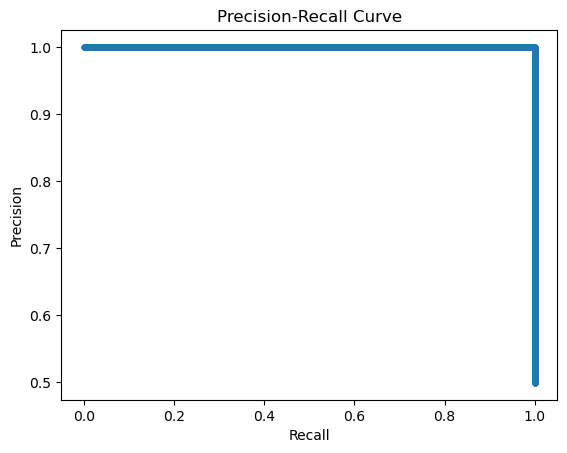

In [178]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(testY, predicted_values)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()